Choose a method:
-------------------------------------
Interpolation for equal segments :
-------------------------------------
1. Newton’s Forward Interpolation
2. Newton’s Backward Interpolation
-------------------------------------
Interpolation for unequal segments :
-------------------------------------
3. Newton’s Divide Difference Formula
4. Lagrange Interpolation
-------------------------------------
Differentiation :
-------------------------------------
5. Newton’s Forward Differentiation
6. Newton’s Backward Differentiation
-------------------------------------
Enter your choice (1-6): 6
Enter the number of data points: 3
Enter data:
x[0] = 1.1
y[0] = 1.45
x[1] = 1.2
y[1] = 1.65
x[2] = 1.3
y[2] = 1.98
Enter the value of x where you want to calculate the derivative: 1.2
The first derivative at x = 1.20 is 2.00


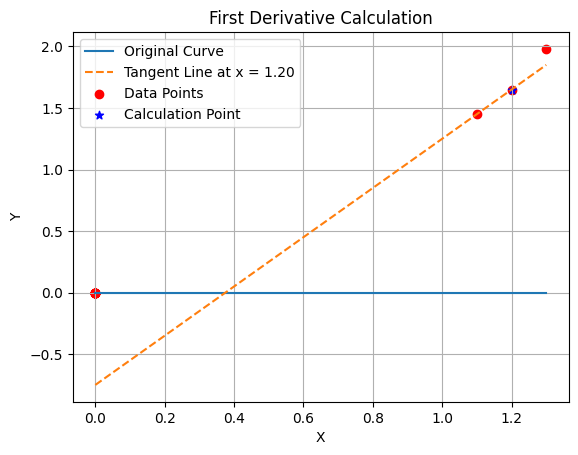

In [11]:
import matplotlib.pyplot as plt
import numpy as np

def main():
    print("Choose a method:")
    print("-------------------------------------")
    print("Interpolation for equal segments :")
    print("-------------------------------------")
    print("1. Newton’s Forward Interpolation")
    print("2. Newton’s Backward Interpolation")
    print("-------------------------------------")
    print("Interpolation for unequal segments :")
    print("-------------------------------------")
    print("3. Newton’s Divide Difference Formula")
    print("4. Lagrange Interpolation")
    print("-------------------------------------")
    print("Differentiation :")
    print("-------------------------------------")
    print("5. Newton’s Forward Differentiation")
    print("6. Newton’s Backward Differentiation")
    print("-------------------------------------")

    choice = int(input("Enter your choice (1-6): "))

    if choice not in range(1, 7):
        print("Invalid choice. Exiting.")
        return

    if choice == 1:
        def calculate_u(u, n):
            temp = u
            for i in range(1, n):
                temp = temp * (u - i)
            return temp

        def factorial(n):
            # Calculate the factorial of a given number n
            f = 1
            for i in range(2, n + 1):
                f *= i
            return f

        def display_forward_difference_table(x, y, n):
            # Display forward difference table for better visualization
            for i in range(n):
                print(x[i], end="\t")
                for j in range(n - i):
                    print(y[i][j], end="\t")
                print("")

        def interpolate(x, y, n, value):
            # Perform interpolation to estimate the value at a given point
            sum = y[0][0]
            u = (value - x[0]) / (x[1] - x[0])
            for i in range(1, n):
                sum = sum + (calculate_u(u, i) * y[0][i]) / factorial(i)
            return round(sum, 6)

        n = int(input("Enter the number of data points: "))
        x = []
        y = []

        # Input the data points
        for i in range(n):
            x_val = float(input(f"Enter x[{i}]: "))
            y_val = float(input(f"Enter y[{i}]: "))
            x.append(x_val)
            y.append([0] * n)
            y[i][0] = y_val

        for i in range(1, n):
            for j in range(n - i):
                y[j][i] = y[j + 1][i - 1] - y[j][i - 1]

        print("\nForward Difference Table:")
        display_forward_difference_table(x, y, n)
        value = float(input("\nEnter the value to interpolate at: "))
        result = interpolate(x, y, n, value)
        print(f"\nInterpolated value at {value} is approximately {result}")

        # Visualization
        plt.scatter(x, [y[i][0] for i in range(n)], label='Data Points')
        x_values = np.linspace(min(x), max(x), 100)
        y_values = [interpolate(x, y, n, val) for val in x_values]
        plt.plot(x_values, y_values, label='Interpolation Curve')
        plt.scatter(value, result, color='red', marker='o', label=f'Target Value ({value}, {result:.6f})')
        plt.title("Newton’s Forward Interpolation")
        plt.xlabel("X")
        plt.ylabel("Y")
        plt.legend()
        plt.show()

    elif choice == 2:
        # Newton’s Backward Interpolation

        # Function to calculate 'u' as per the formula
        def calculate_u(u, n):
            temp = u
            for i in range(1, n):
                temp = temp * (u - i)
            return temp

        # Function to compute the factorial of 'n'
        def factorial(n):
        # Calculate the factorial of a given number n
            f = 1
            for i in range(2, n + 1):
                f *= i
            return f
        # User input: Number of data points
        n = int(input("Enter the number of data points: "))
        # Initialize lists to store data
        x = []
        y = []
        # Input data points
        for i in range(n):
            x_val = float(input(f"Enter x[{i}]: "))
            y_val = float(input(f"Enter y[{i}]: "))
            x.append(x_val)
            y.append([0] * n)  # Initialize difference table
            y[i][0] = y_val
        # Calculate the backward difference table
        for i in range(1, n):
            for j in range(n - 1, i - 1, -1):
                y[j][i] = y[j][i - 1] - y[j - 1][i - 1]
        # Display the backward difference table
        for i in range(n):
            for j in range(i + 1):
                print(y[i][j], end="\t")
            print()
    # User input: Value to interpolate at
        value = float(input("Enter the value to interpolate: "))
        # Initialize 'u' and 'result'
        result = y[n - 1][0]
        u = (value - x[n - 1]) / (x[1] - x[0])

        # Calculate the interpolated value using Newton's backward interpolation
        for i in range(1, n):
            term = calculate_u(u, i) * y[n - 1][i] / factorial(i)
            result += term

        # Display the interpolated value
        print(f"\nThe interpolated value at {value} is approximately {result}")


        # Visualize Newton's Backward Interpolation
        x_points = np.array(x)
        y_points = np.array([y_val[0] for y_val in y])

        x_range = np.linspace(min(x_points), max(x_points), 1000)
        y_range = np.zeros_like(x_range)

        for i in range(n):
            term = y[i][i]
            for j in range(i):
                term *= (x_range - x[j])
                term /= (x[i] - x[j])
            y_range += term

        plt.plot(x_points, y_points, 'ro', label='Known Data Points')
        plt.plot(x_range, y_range, label="Newton's Backward Interpolation")
        plt.scatter(value, result, color='blue', marker='*', label='Interpolated Point')

        plt.xlabel('X')
        plt.ylabel('Y')
        plt.title("Newton's Backward Interpolation")
        plt.legend()
        plt.grid(True)
        plt.show()

    elif choice == 3:
        def calculate_product_term(i, value, x):
            product = 1
            for j in range(i):
                product = product * (float(value) - x[j])
            return product

        # Function for calculating the divided difference table
        def calculate_divided_difference_table(x, y, n):
            for i in range(1, n):
                for j in range(n - i):
                    y[j][i] = ((y[j][i - 1] - y[j + 1][i - 1]) / (x[j] - x[i + j]))
            return y

        # Function for applying Newton's divided difference formula
        def apply_newton_formula(value, x, y, n):
            result = y[0][0]
            for i in range(1, n):
                result = result + (calculate_product_term(i, value, x) * y[0][i])
            return result

        # Function for displaying the divided difference table
        def display_divided_difference_table(y, n):
            for i in range(n):
                for j in range(n - i):
                    print(round(y[i][j], 4), "\t", end=" ")
                print("")

        n = int(input("Enter the number of inputs: "))
        x = []
        y = [[0 for i in range(n)] for j in range(n)]

        for i in range(n):
            x_val = float(input(f"Enter x[{i}]: "))
            y_val = float(input(f"Enter y[{i}]: "))
            x.append(x_val)
            y[i][0] = y_val

        # Calculate the divided difference table
        y = calculate_divided_difference_table(x, y, n)

        # Display the divided difference table
        print("\nDivided Difference Table:")
        display_divided_difference_table(y, n)

        # User input: Value to interpolate
        value = input("Enter Value to interpolate: ")

        # Calculate and display the interpolated value
        interpolated_value = apply_newton_formula(value, x, y, n)
        print("\nInterpolated value at", value, "is approximately", round(interpolated_value, 4))

        # Visualize the Newton's divided difference interpolation
        x_range = np.linspace(min(x), max(x), 1000)
        y_range = [apply_newton_formula(x_i, x, y, n) for x_i in x_range]
        # Plot the interpolation curve
        plt.plot(x_range, y_range, label='Divided Difference Interpolation')

        # Plot the original data points
        plt.scatter(x, [y_i[0] for y_i in y], color='red', marker='o', label='Original Data Points')

        # Plot the interpolated point
        interpolated_value = apply_newton_formula(float(value), x, y, n)
        plt.scatter(float(value), interpolated_value, color='blue', marker='*', label='Interpolated Point')
        plt.xlabel('X')
        plt.ylabel('Y')
        plt.title('Newton\'s Divided Difference Interpolation')
        plt.legend()
        plt.grid(True)
        plt.show()


    elif choice == 4:
        class DataPoint:
            def __init__(self, x, y):
                self.x = x
                self.y = y

        # Function for Lagrange Interpolation
        def lagrange_interpolation(data_points, x_value):
            result = 0.0

            # Iterate through each data point
            for i in range(len(data_points)):
                term = data_points[i].y

                # Calculate the Lagrange term for the current data point
                for j in range(len(data_points)):
                    if j != i:
                        term *= (x_value - data_points[j].x) / (data_points[i].x - data_points[j].x)

                # Add the term to the result
                result += term

            return result

        if __name__ == "__main__":
            data_points = []

            # Input the number of known data points
            n = int(input("Enter the number of known data points: "))

            # Input x and y values for each data point
            for i in range(n):
                x = float(input(f"Enter x{i + 1}: "))
                y = float(input(f"Enter y{i + 1}: "))
                data_points.append(DataPoint(x, y))

            # Input the x value for interpolation
            x_value = float(input("Enter the x value for interpolation: "))

            # Calculate and print the interpolated value
            interpolated_value = lagrange_interpolation(data_points, x_value)
            print(f"Interpolated value at {x_value} is: {interpolated_value}")

            # Visualize the Lagrange interpolation
            x_points = [point.x for point in data_points]
            y_points = [point.y for point in data_points]

            x_range = np.linspace(min(x_points), max(x_points), 1000)
            y_range = [lagrange_interpolation(data_points, x) for x in x_range]

            plt.plot(x_points, y_points, 'ro', label='Known Data Points')
            plt.plot(x_range, y_range, label='Lagrange Interpolation')
            plt.scatter(x_value, interpolated_value, color='blue', marker='*', label='Interpolated Point')

            plt.xlabel('X')
            plt.ylabel('Y')
            plt.title('Lagrange Interpolation')
            plt.legend()
            plt.grid(True)
            plt.show()

    elif choice == 5:
        import math

        def main():
            x = [0.0] * 20
            y = [[0.0] * 20 for _ in range(20)]
            sum_value = 0.0
            index = 0
            flag = 0
            sign = 1

            # Read the number of data points
            n = int(input("Enter the number of data points: "))
            # Read the actual data for x and y
            print("Enter data:")
            for i in range(n):
                x[i] = float(input(f"x[{i}] = "))
                y[i][0] = float(input(f"y[{i}] = "))
            # Read the calculation point
            xp = float(input("Enter the value of x where you want to calculate the derivative: "))
            # Check if the given point (xp) is a valid point in the x data
            for i in range(n):
                if abs(xp - x[i]) < 0.0001:
                    index = i
                    flag = 1
                    break
            # If the flag is still 0, (xp) is not in the list of x data
            if flag == 0:
                print("Invalid calculation point. Exiting program...")
                exit(0)
            # Generate the Forward Difference Table
            for i in range(1, n):
                for j in range(n - i):
                    y[j][i] = y[j + 1][i - 1] - y[j][i - 1]
            # Calculate the finite difference (step size)
            h = x[1] - x[0]
            # Apply the formula to calculate the sum of terms for derivatives
            for i in range(1, n - index):
                term = (y[index][i] ** i) / i
                sum_value += sign * term
                sign = -sign
            # Divide by h to get the first derivative
            first_derivative = sum_value / h
            # Display the final result
            print(f"The first derivative at x = {xp:.2f} is {first_derivative:.2f}")

            # Visualize the data points and the tangent line at the calculation point
            x_range = np.linspace(min(x), max(x), 1000)
            y_range = np.zeros_like(x_range)

            for i in range(1, n - index):
                term = 0.0
                if i != 0:  # Skip division by zero when i is zero
                    term = (y[index][i] ** i) / i
                sum_value += sign * term
                sign = -sign

            tangent_line = first_derivative * (x_range - xp) + y[index][0]

            plt.plot(x_range, y_range, label='Original Curve')
            plt.plot(x_range, tangent_line, label='Tangent Line at x = {:.2f}'.format(xp), linestyle='dashed')
            plt.scatter(x, [y_val[0] for y_val in y], color='red', label='Data Points')
            plt.scatter(xp, y[index][0], color='blue', marker='*', label='Calculation Point')

            plt.xlabel('X')
            plt.ylabel('Y')
            plt.title('First Derivative Calculation')
            plt.legend()
            plt.grid(True)
            plt.show()

        if __name__ == "__main__":
            main()

    elif choice == 6:
        def main():
            x = [0.0] * 20
            y = [[0.0] * 20 for _ in range(20)]
            sum_value = 0.0
            index = 0
            flag = 0

            # Read the number of data points
            n = int(input("Enter the number of data points: "))

            # Read the actual data for x and y
            print("Enter data:")
            for i in range(n):
                x[i] = float(input(f"x[{i}] = "))
                y[i][0] = float(input(f"y[{i}] = "))

            # Read the calculation point
            xp = float(input("Enter the value of x where you want to calculate the derivative: "))

            # Check if the given point (xp) is a valid point in the x data
            for i in range(n):
              if abs(xp - x[i]) < 0.0001:
                index = i
                flag = 1
                break
            # If the flag is still 0, the given point (xp) is not in the list of x data
            if flag == 0:
                print("Invalid calculation point. Exiting the program...")
                exit(0)
            # Generate the Backward Difference Table
            for i in range(1, n):
                for j in range(n - 1, i - 1, -1):
                    y[j][i] = y[j][i - 1] - y[j - 1][i - 1]

            # Calculate the finite difference (step size)
            h = x[1] - x[0]

            # Apply the formula to calculate the sum of terms for finding derivatives using the backward difference formula
            for i in range(1, index + 1):
                term = (y[index][i] ** i) / i
                sum_value += term

            # Divide by h to get the first derivative
            first_derivative = sum_value / h

            # Display the final result
            print(f"The first derivative at x = {xp:.2f} is {first_derivative:.2f}")

            # Visualize the data points and the tangent line at the calculation point
            x_range = np.linspace(min(x), max(x), 1000)
            y_range = np.zeros_like(x_range)

            sign = 1  # Initialize 'sign' before the loop
            for i in range(1, n - index):
                term = 0.0
                if i != 0:  # Skip division by zero when i is zero
                    term = (y[index][i] ** i) / i
                sum_value += sign * term
                sign = -sign

            tangent_line = first_derivative * (x_range - xp) + y[index][0]

            plt.plot(x_range, y_range, label='Original Curve')
            plt.plot(x_range, tangent_line, label='Tangent Line at x = {:.2f}'.format(xp), linestyle='dashed')
            plt.scatter(x, [y_val[0] for y_val in y], color='red', label='Data Points')
            plt.scatter(xp, y[index][0], color='blue', marker='*', label='Calculation Point')

            plt.xlabel('X')
            plt.ylabel('Y')
            plt.title('First Derivative Calculation')
            plt.legend()
            plt.grid(True)
            plt.show()

        if __name__ == "__main__":
            main()

if __name__ == "__main__":
    main()
